In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Download MNIST
mnist = fetch_openml('mnist_784')
X, y = mnist.data, mnist.target

# Normalize pixel values
X = X / 255.0

# Take a 10% random sample
_, X_sample, _, y_sample = train_test_split(X, y, test_size=0.01, stratify=y, random_state=42)

In [4]:
# Set up values for k (1 to 10)
k_values = range(1, 11)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    correct_predictions = 0
    total_predictions = 0

    for i in range(len(X_sample)):
        train_index = np.arange(len(X_sample)) != i
        test_index = np.array([i])
        X_train, y_train = X_sample[train_index], y_sample[train_index]
        X_test, y_test = X_sample.iloc[test_index], y_sample.iloc[test_index]

        knn.fit(X_train, y_train)
        prediction = knn.predict(X_test)
        correct_predictions += (prediction == y_test).sum()
        total_predictions += 1

    accuracy = correct_predictions / total_predictions
    accuracies.append(accuracy)


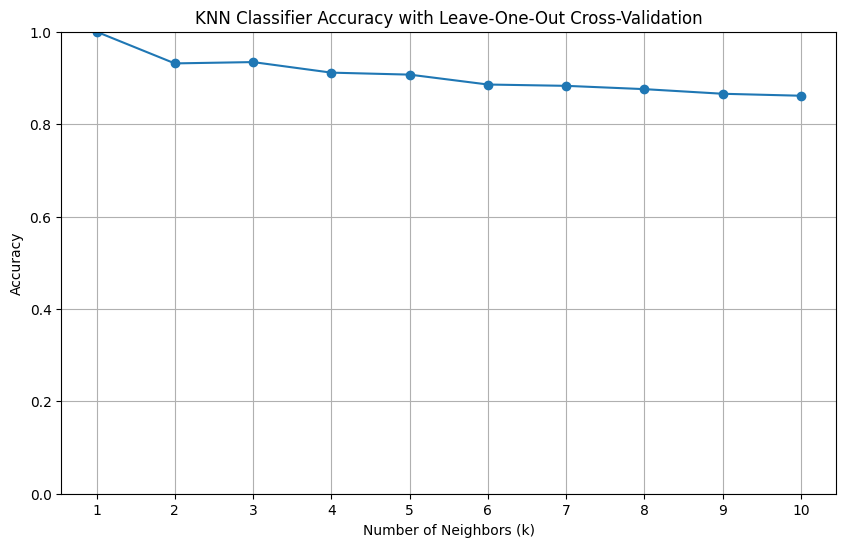

In [22]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Classifier Accuracy with Leave-One-Out Cross-Validation')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.ylim([0, 1])
plt.grid()
plt.show()
